## Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

- Data Description :

- Undergrad : person is under graduated or not
- Marital.Status : marital status of a person
- Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
- Work Experience : Work experience of an individual person
- Urban : Whether that person belongs to urban area or not

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.metrics import classification_report

%matplotlib inline

In [8]:
df = pd.read_csv('Fraud_check.csv')
df.rename(columns={'Marital.Status' : 'Marital_Status', 'Taxable.Income' : 'Income',
                    'City.Population' : 'Population', 'Work.Experience': 'Experience'},inplace=True)
df

,Undergrad,Marital_Status,Income,Population,Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


## EDA 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Undergrad       600 non-null    object
 1   Marital_Status  600 non-null    object
 2   Income          600 non-null    int64 
 3   Population      600 non-null    int64 
 4   Experience      600 non-null    int64 
 5   Urban           600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [10]:
df['Status'] = np.where((df['Income'] <= 30000), 'Risky','Good')
df1 = df.drop(columns='Income')
df1

,Undergrad,Marital_Status,Population,Experience,Urban,Status
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [12]:
oe = OrdinalEncoder()
le = LabelEncoder()

df1.iloc[:,[0,1,4]] = oe.fit_transform(df1.iloc[:,[0,1,4]])
df1['Status'] = le.fit_transform(df1['Status'])
df1

,Undergrad,Marital_Status,Population,Experience,Urban,Status
0,0.0,2.0,50047,10,1.0,0
1,1.0,0.0,134075,18,1.0,0
2,0.0,1.0,160205,30,1.0,0
3,1.0,2.0,193264,15,1.0,0
4,0.0,1.0,27533,28,0.0,0
...,...,...,...,...,...,...
595,1.0,0.0,39492,7,1.0,0
596,1.0,0.0,55369,2,1.0,0
597,0.0,0.0,154058,0,1.0,0
598,1.0,1.0,180083,17,0.0,0


## Splitting the data

In [13]:
x = df1.iloc[:,:4]
y = df1['Status']

In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1)

## Building Model

In [15]:
dt = DecisionTreeClassifier(criterion='gini')

In [16]:
dt.fit(xtrain, ytrain)

ypred = dt.predict(xtest)

In [17]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        97
           1       0.12      0.17      0.14        23

    accuracy                           0.60       120
   macro avg       0.45      0.44      0.44       120
weighted avg       0.66      0.60      0.62       120



In [18]:
print('Training Accuracy: ', dt.score(xtrain, ytrain))
print('Testing Accuracy: ', dt.score(xtest, ytest))

Training Accuracy:  1.0
Testing Accuracy:  0.6


## Creating tree Daigram

In [19]:
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['figure.dpi'] = 250

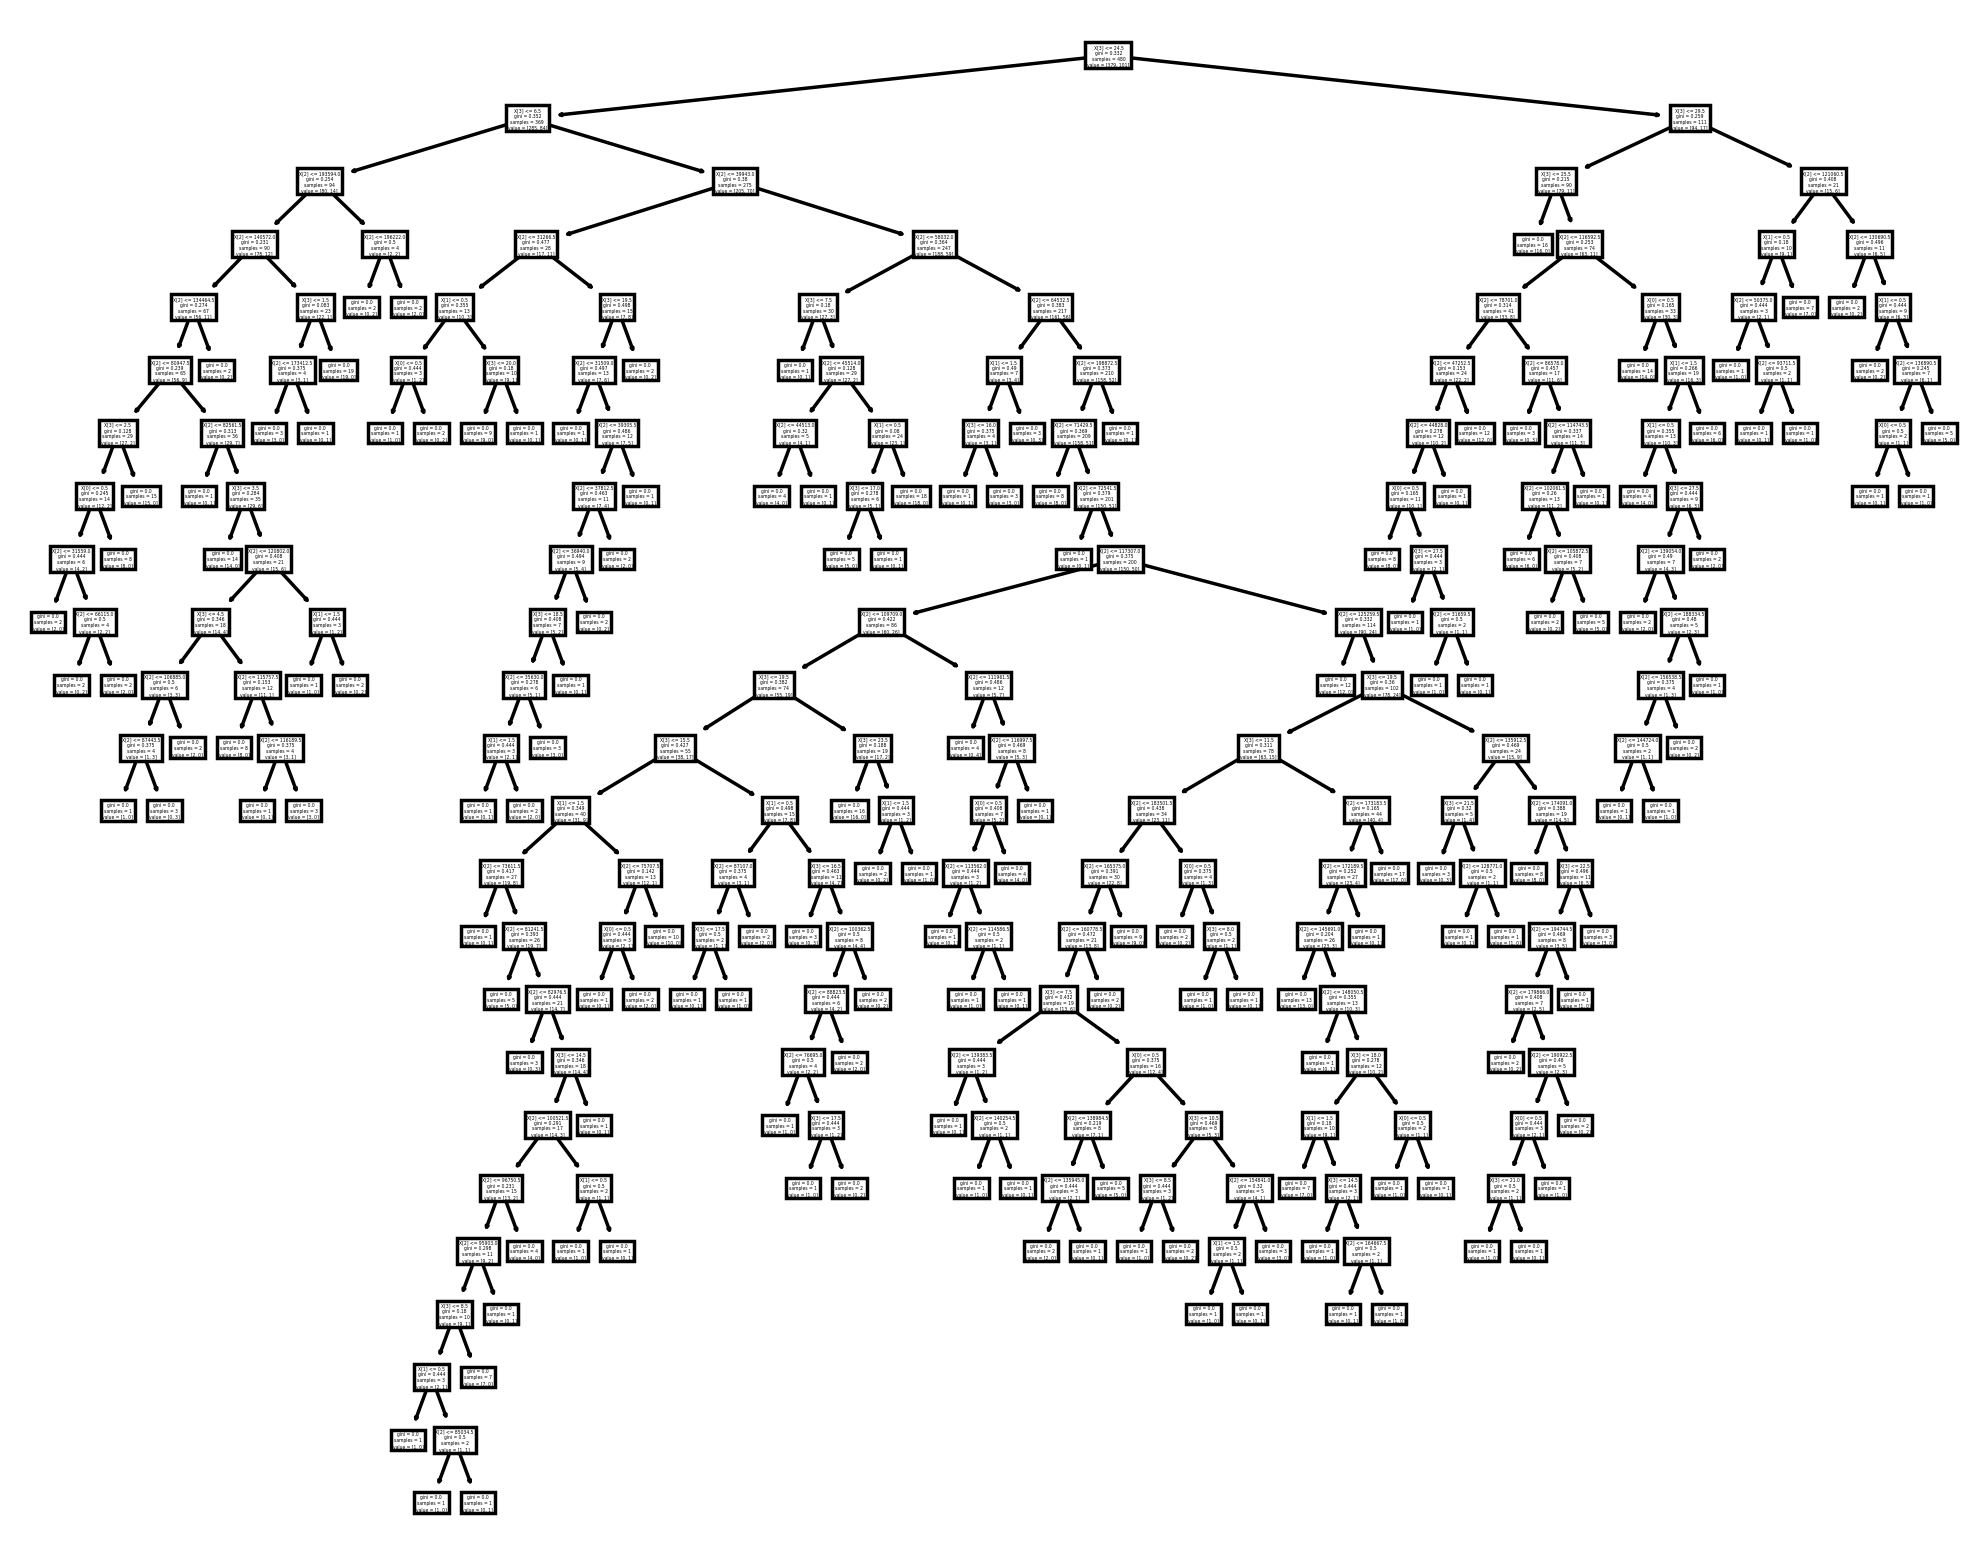

In [20]:
tree.plot_tree(dt)
plt.show()

## Hyperparameter Tuning 

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [4,5,6,7,8,9]
}

In [23]:
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=params)

In [25]:
grid.fit(xtrain, ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9]})

In [26]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 4}

##  Buildng Improved Model

In [27]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=4)

In [28]:
dt. fit(xtrain, ytrain)

ypred = dt.predict(xtest)

In [29]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86        97
           1       0.12      0.04      0.06        23

    accuracy                           0.76       120
   macro avg       0.46      0.49      0.46       120
weighted avg       0.67      0.76      0.71       120



In [31]:
print('Training Accuracy: ', dt.score(xtrain, ytrain))
print('Testing Accuracy: ', dt.score(xtest,ytest))

Training Accuracy:  0.8
Testing Accuracy:  0.7583333333333333


## Tree Diagram  

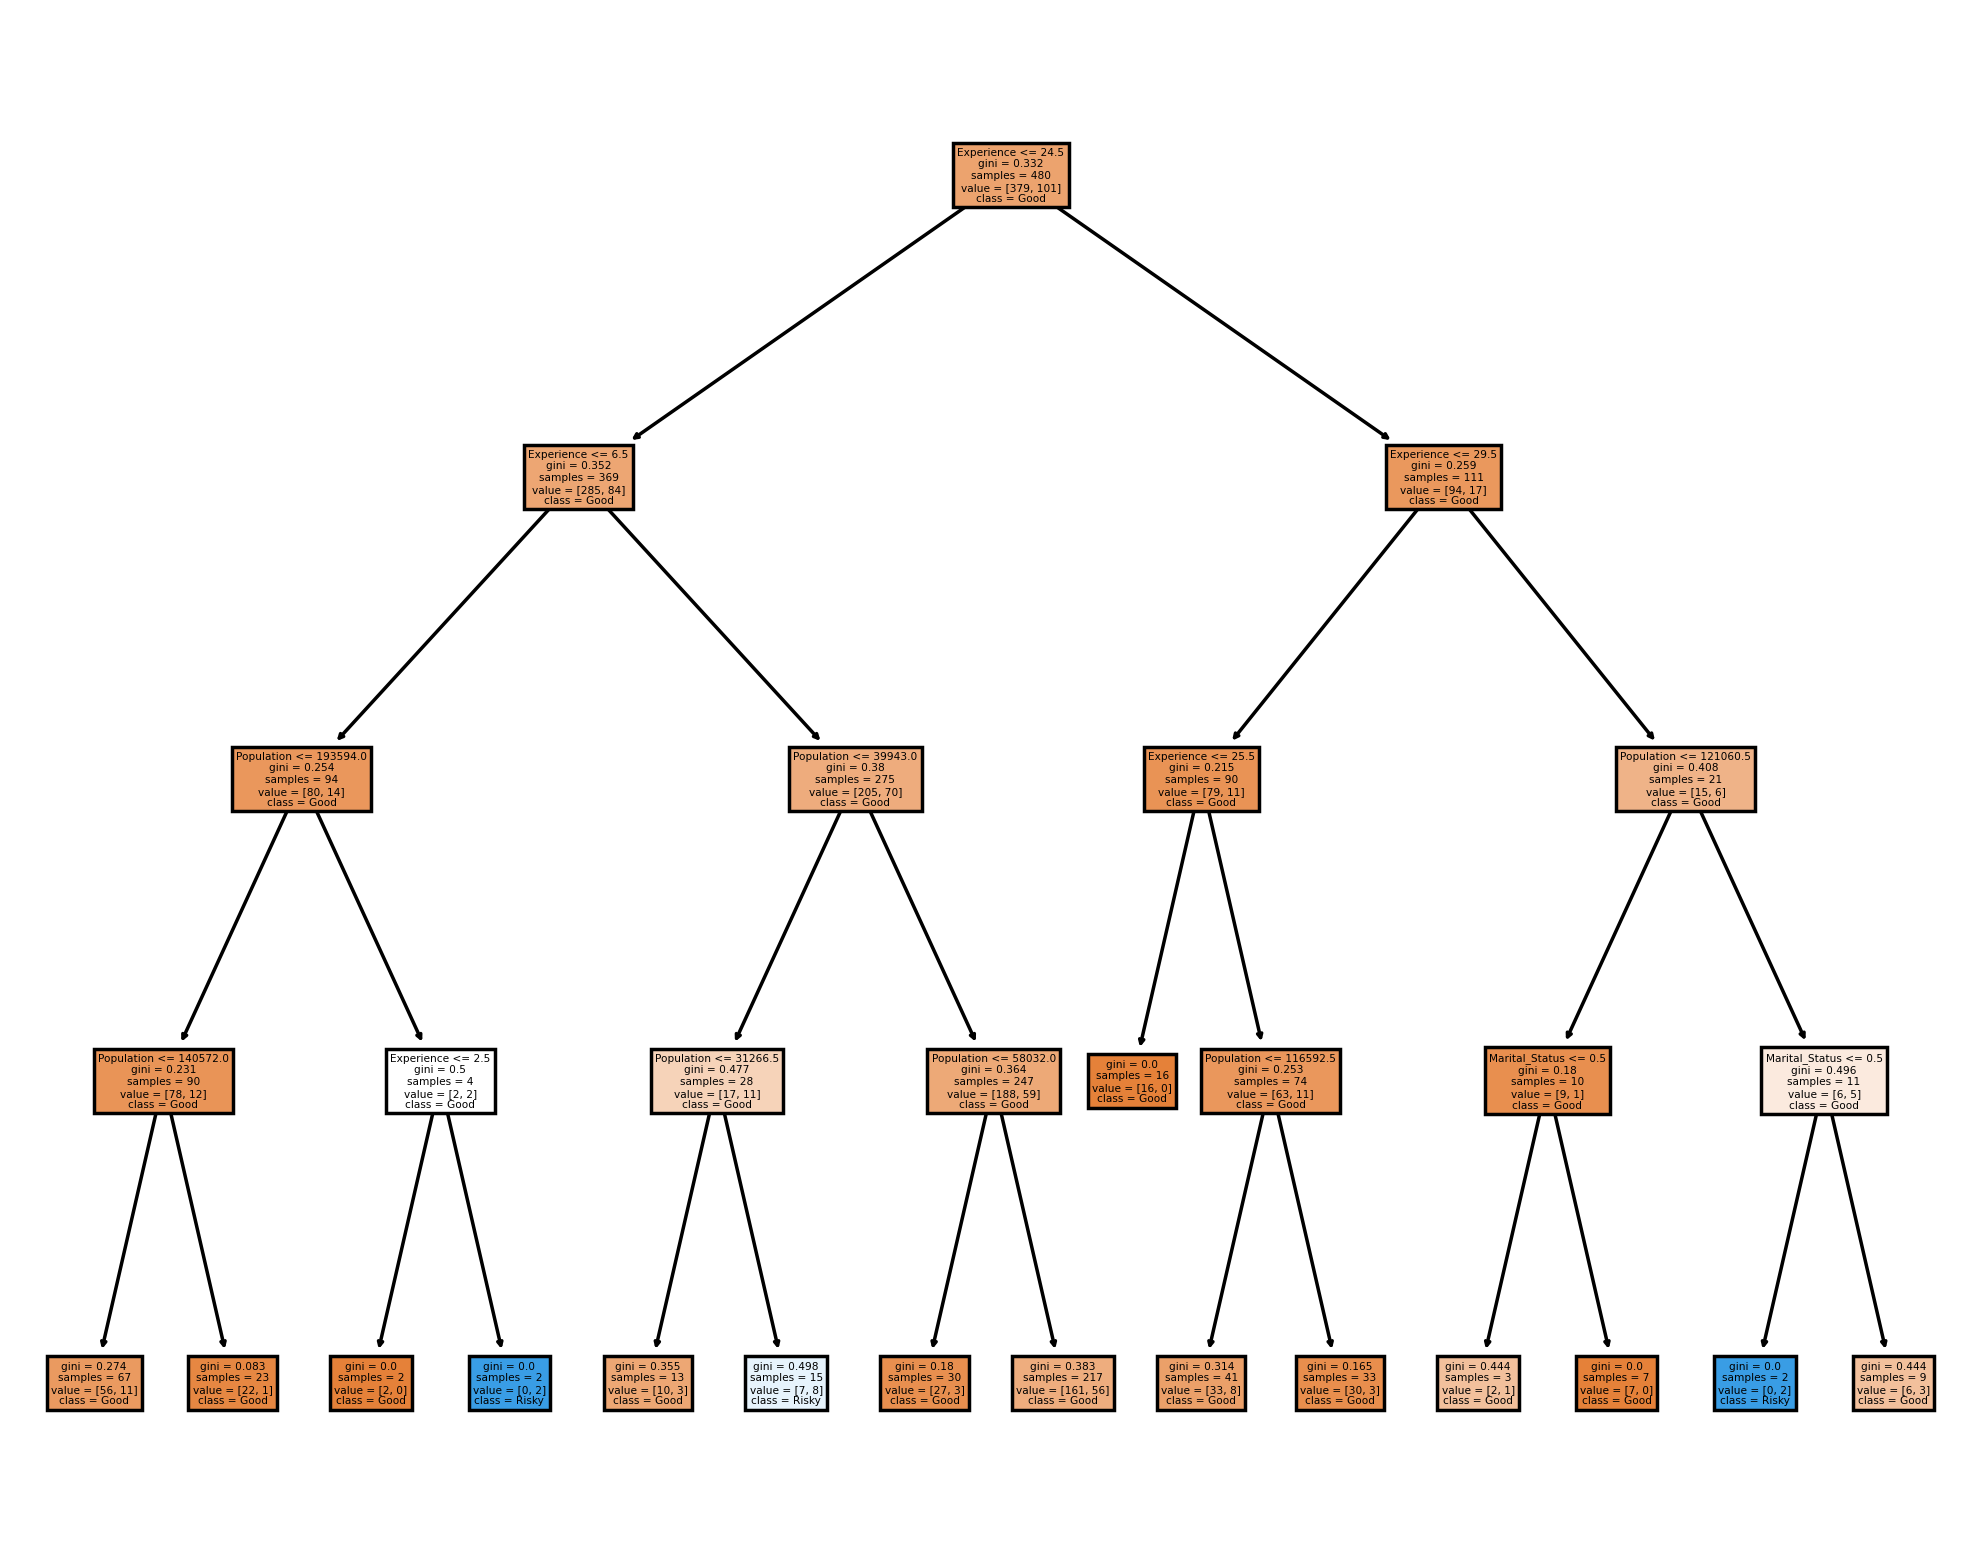

In [32]:
tree.plot_tree(dt, feature_names=x.columns, class_names=df['Status'].unique(), filled=True)
plt.show()